In [16]:
__author__ = "Philipp Kats"
__date__ = "2015_10_15"

import pandas as pd
import numpy as np

import pylab as plt
import os
import json

import requests
s = requests.get("https://raw.githubusercontent.com/Casyfill/CUSP_templates/master/Py/fbMatplotlibrc.json").json()
plt.rcParams.update(s)

%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [17]:
import geopandas as gp
from geopandas.tools import sjoin

In [18]:
parqa = os.getenv('PARQA') #basic path

In [19]:
parks = gp.read_file(parqa + 'data/parks_computed.geojson')

In [20]:
parks.head(2)

,BOROUGH,GISPROPNUM,LOCATION,NYS_ASSEMB,NYS_SENATE,Park_District,SHAPE_STAr,SHAPE_STLe,SIGNNAME,TYPECATEGO,US_CONGRES,WATERFRONT,geometry,id,park_area
0,Q,Q104,"Queensboro Bridge, 41 Rd., 40 Ave. bet. The Ea...",37,12,Q-01,903579.125015,7376.271660,Queensbridge Park,Community Park,12,Yes,"(POLYGON ((998639.7287544757 214672.844326064,...",0,903579.125068
1,X,X253,City Island Ave bet. Centre St. and Winter St.,82,34,X-10,263831.264191,2635.610175,Ambrosini Field,Recreation Field/Courts,14,Yes,"POLYGON ((1044445.201119721 246876.5331993997,...",1,263831.264211


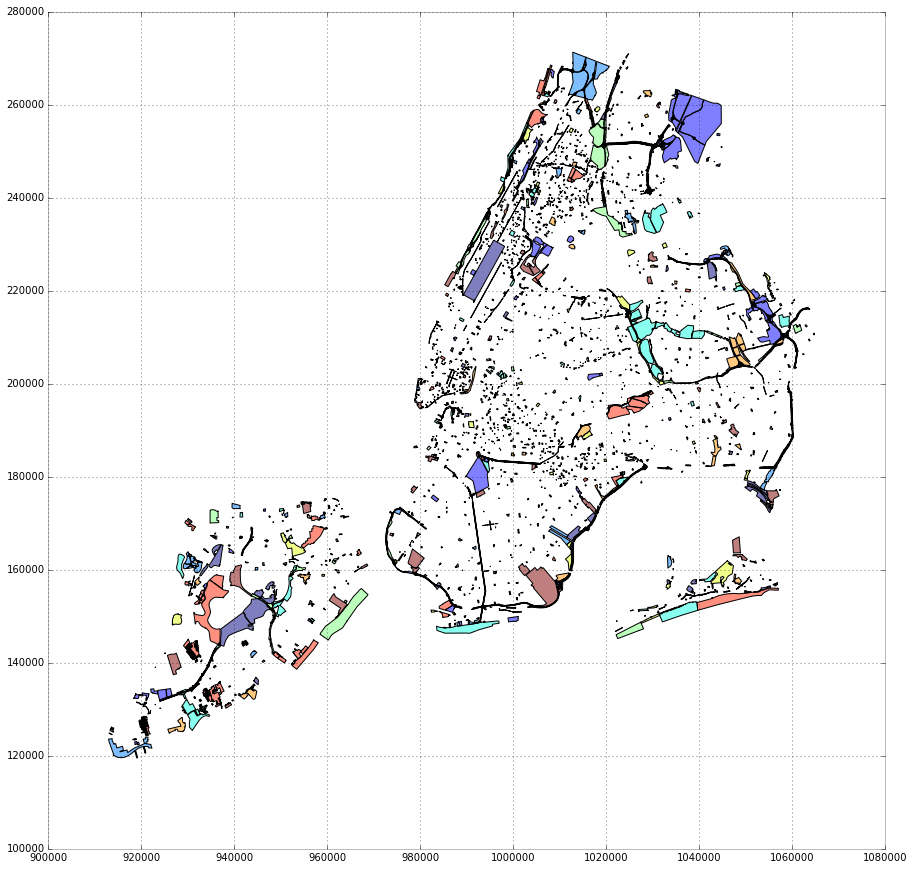

In [21]:
parks.plot(figsize=(15,15));

In [22]:
## FOR some reason I find unable to plot grouped df in the same plot; need to try it one more time
# pgroups = parks.groupby('Park_District')

# for name, g in pgroups:
#     g.plot()

In [23]:
District_park_areas = parks.groupby('Park_District', as_index=False).agg({'park_area':'sum'})
District_park_areas.rename(columns={'park_area':'district_park_area'}, inplace=True)

In [24]:
parks = parks.merge(District_park_areas, on="Park_District")
parks.head(2)

,BOROUGH,GISPROPNUM,LOCATION,NYS_ASSEMB,NYS_SENATE,Park_District,SHAPE_STAr,SHAPE_STLe,SIGNNAME,TYPECATEGO,US_CONGRES,WATERFRONT,geometry,id,park_area,district_park_area
0,Q,Q104,"Queensboro Bridge, 41 Rd., 40 Ave. bet. The Ea...",37,12,Q-01,903579.125015,7376.271660,Queensbridge Park,Community Park,12,Yes,"(POLYGON ((998639.7287544757 214672.844326064,...",0,903579.125068,5694448.622307
1,Q,Q465,Vernon Blvd. bet. Broadway and 30 Dr.,37,12,Q-01,199700.239243,3014.558046,Socrates Sculpture Park,Neighborhood Park,12,Yes,"(POLYGON ((1001911.54078038 219553.4448010623,...",4,199700.239270,5694448.622307


In [25]:
parks['District_percent'] = 100.0* parks.park_area/parks.district_park_area

In [26]:
Districts = parks.groupby(['Park_District','TYPECATEGO']).aggregate({'TYPECATEGO':lambda x: len(x), 
                                                                     'District_percent':'sum' })
Districts.rename(columns={'TYPECATEGO':'parks','District_percent':'park_area_percent'},inplace=True)

In [27]:
Districts

parks  park_area_percent
Park_District TYPECATEGO                                           
B-01          Buildings/Institutions           1           0.212782
              Community Park                   2          34.743818
              Garden                          13           1.383238
              Jointly Operated Playground      5           5.070967
              Lot                              1           0.962326
              Managed Sites                    1           0.079899
              Neighborhood Park                6          17.206857
              Parkway                          1           0.713150
              Playground                      17          14.443546
              Recreation Field/Courts          9          21.875477
              Tracking                         1           0.237290
              Triangle/Plaza                  16           3.070650
B-02          Community Park                   3          50.597518
              Garden                           3           0.238624
              Jointly Operated Playground      6           5.492766
              Lot                              1           1.284323
              Managed Sites                    1           0.791038
              Neighborhood Park                9          15.220899
              Parkway                          9           4.809271
              Playground                       8           5.304066
              Recreation Field/Courts          2           2.889826
              Triangle/Plaza                  17          13.371668
B-03          Buildings/Institutions           1           4.034231
              Community Park                   3          22.830981
              Garden                          34           7.235029
              Jointly Operated Playground     16          37.255343
              Neighborhood Park                5          20.287835
              Playground                       7           8.333968
              Triangle/Plaza                   1           0.022612
B-04          Garden                           6           4.076755
...                                          ...                ...
X-09          Playground                       5           1.491198
              Recreation Field/Courts          2           2.327958
              Strip                            2           0.002894
              Triangle/Plaza                   8           0.563922
              Undeveloped                      1           0.008404
X-10          Cemetery                         1           0.019543
              Flagship Park                    1          74.429346
              Jointly Operated Playground      1           0.168746
              Mall                             1           0.034788
              Nature Area                      1           1.687106
              Neighborhood Park                3           2.494940
              Parkway                          1          19.001963
              Playground                       2           0.431956
              Recreation Field/Courts          2           1.575751
              Strip                            2           0.002747
              Triangle/Plaza                   3           0.078251
              Undeveloped                      1           0.074862
X-11          Community Park                   1           0.250948
              Flagship Park                    1          74.211785
              Jointly Operated Playground      2           0.377712
              Parkway                          2          24.022166
              Playground                       7           0.841373
              Recreation Field/Courts          2           0.286524
              Triangle/Plaza                   2           0.009492
X-12          Jointly Operated Playground      6          17.007703
              Nature Area                      1          62.514990
              Neighborhood Park

----------


# PARK CATEGORIES

In [28]:
g = Districts.reset_index().groupby('Park_District')

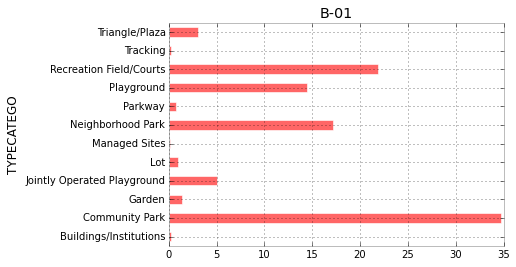

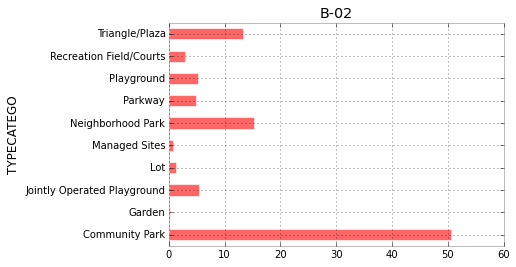

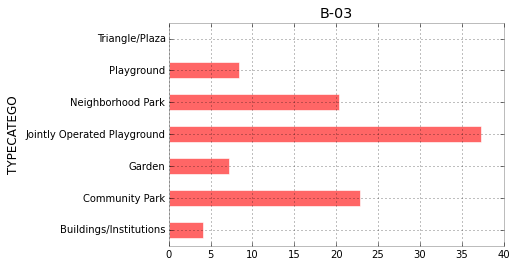

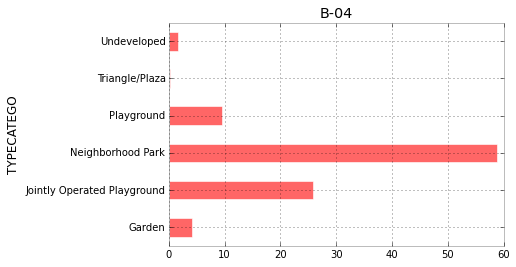

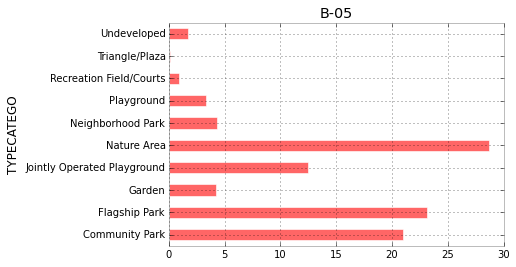

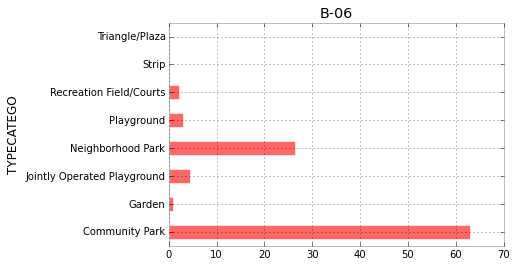

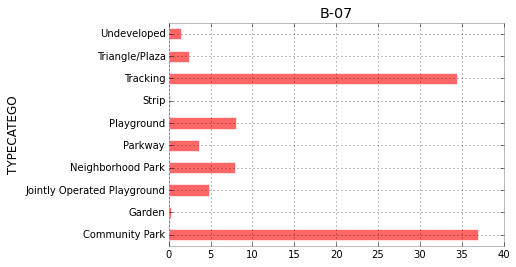

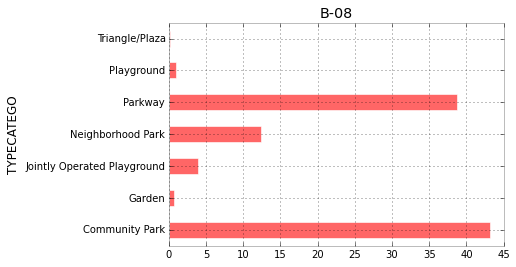

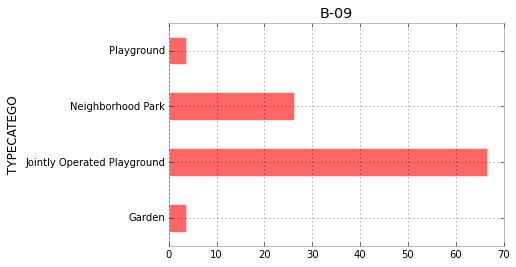

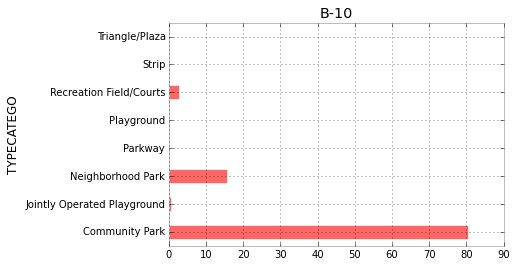

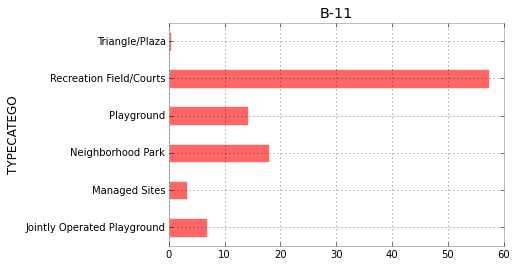

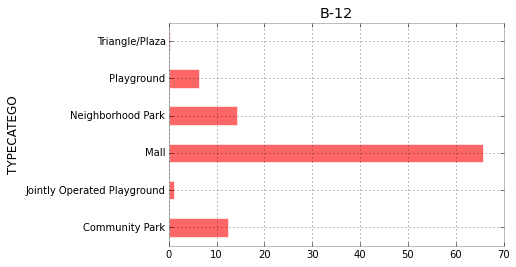

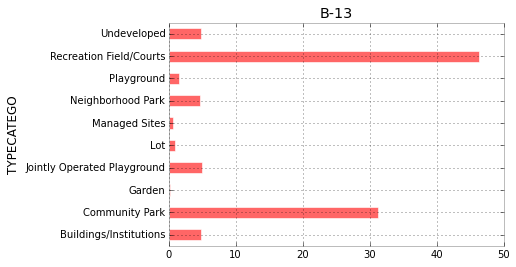

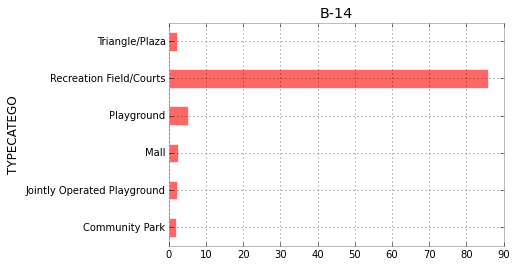

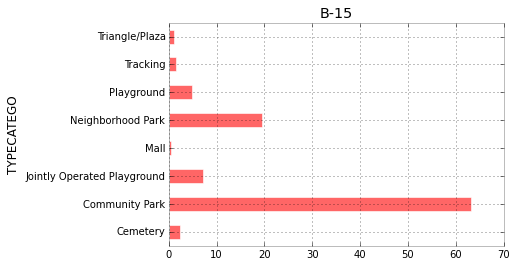

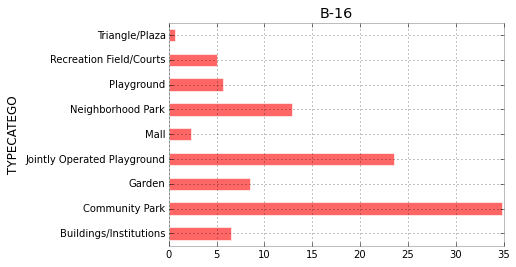

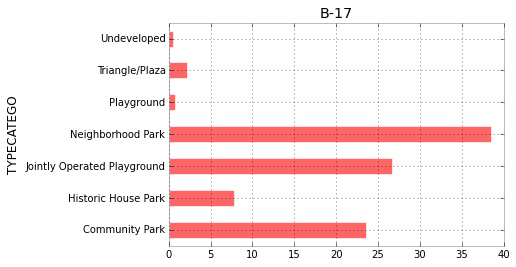

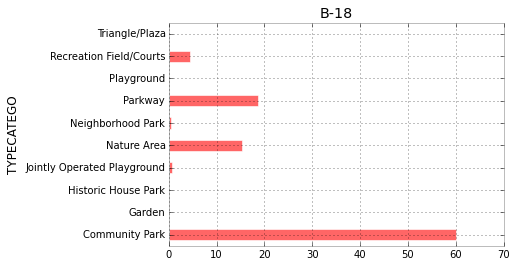

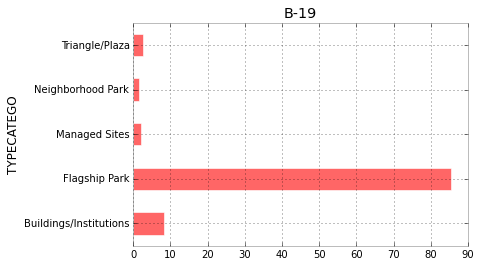

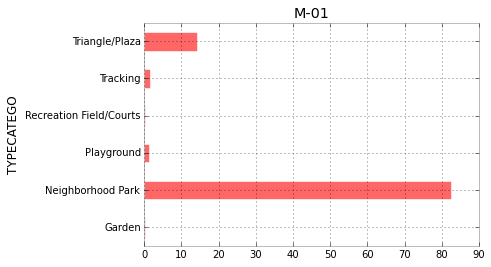

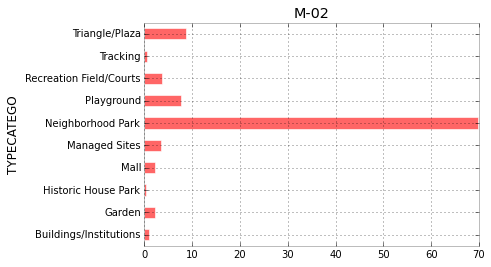

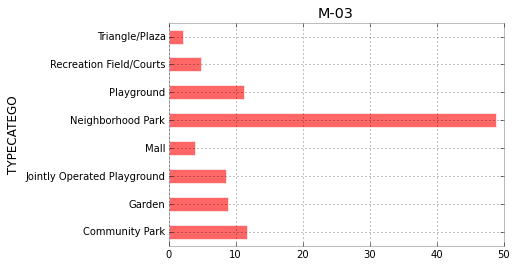

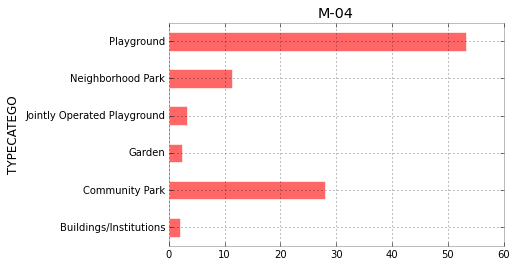

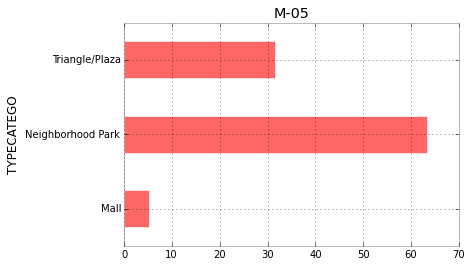

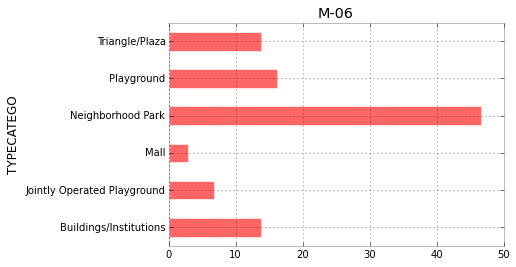

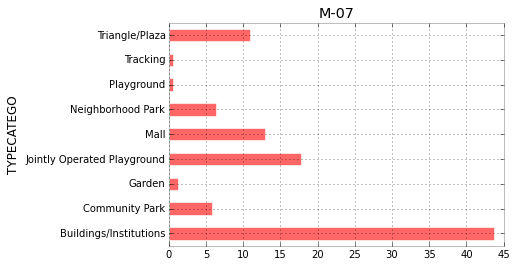

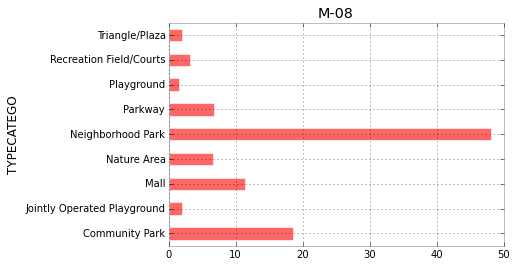

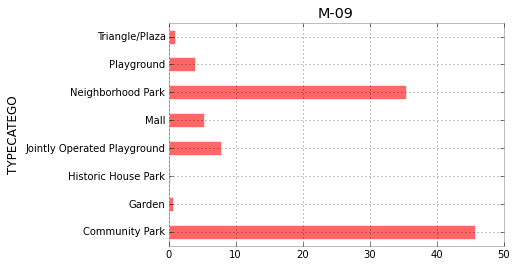

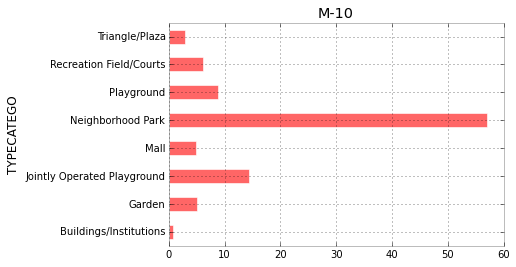

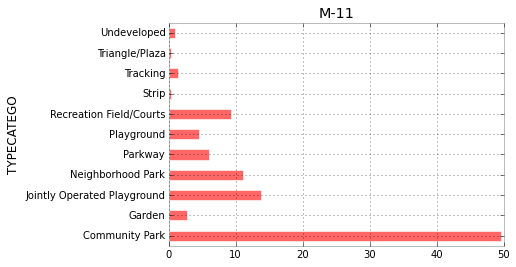

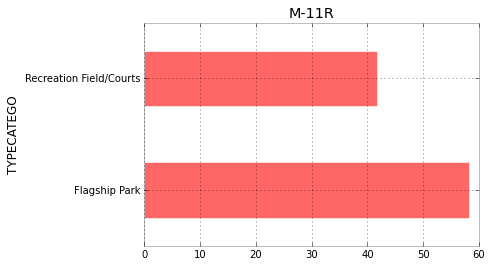

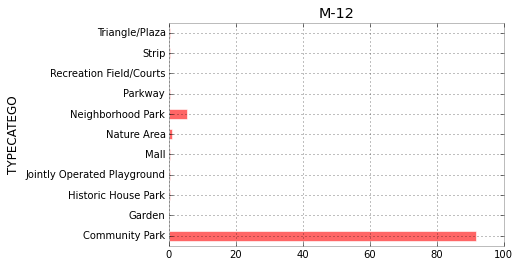

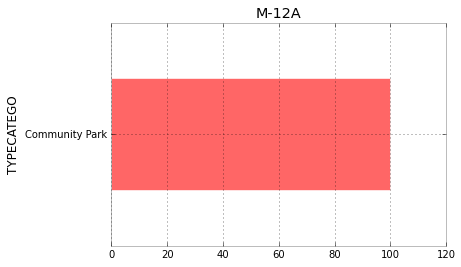

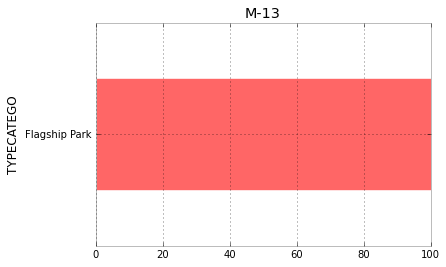

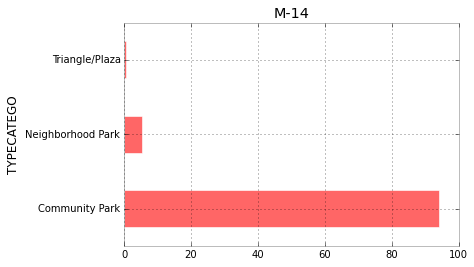

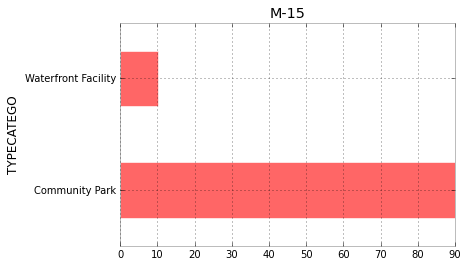

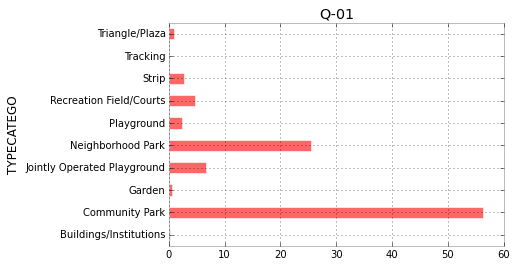

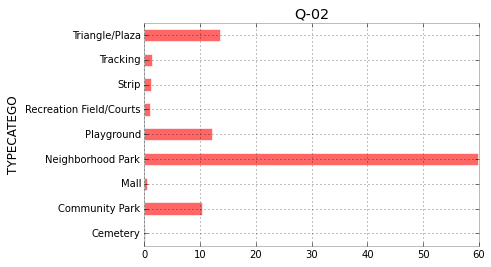

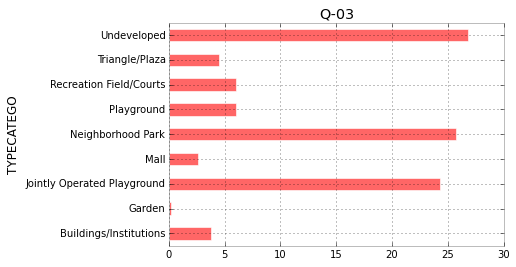

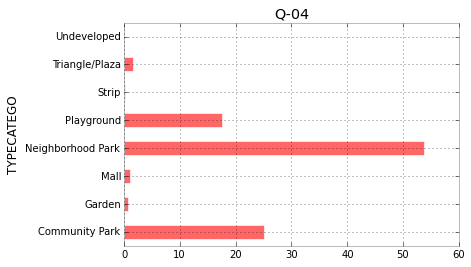

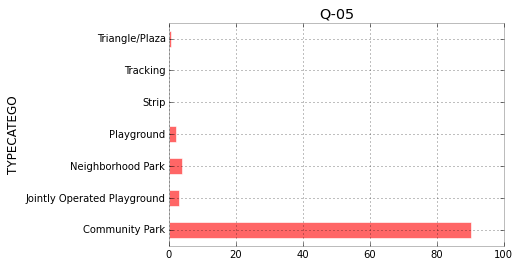

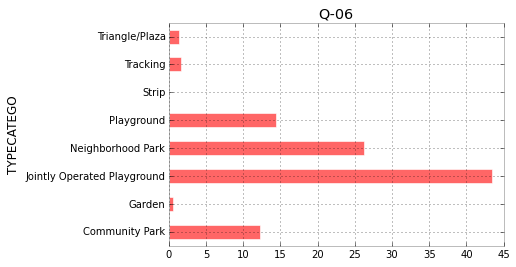

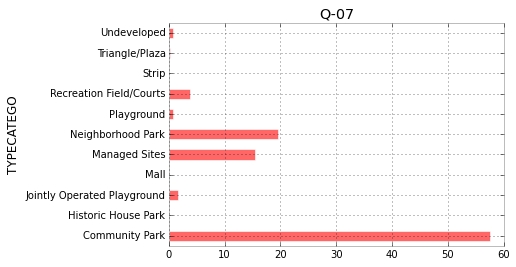

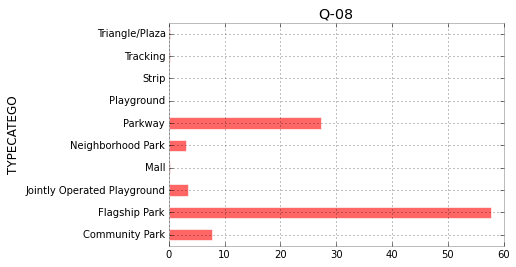

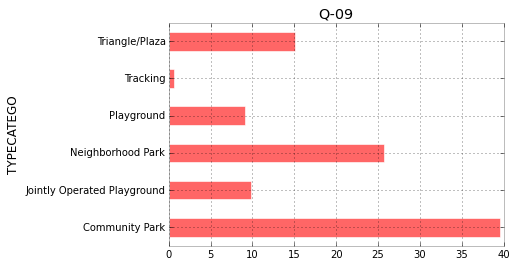

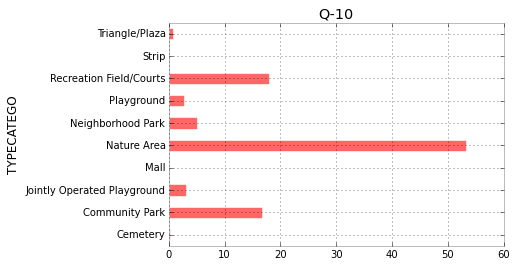

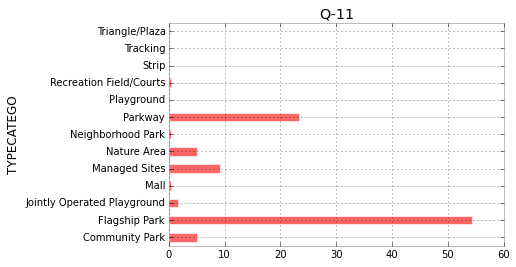

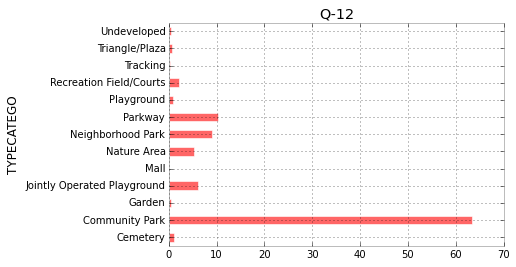

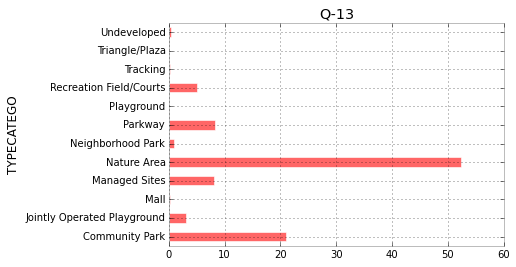

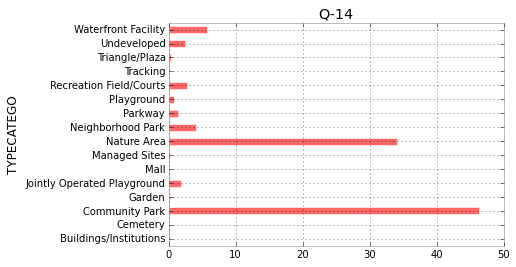

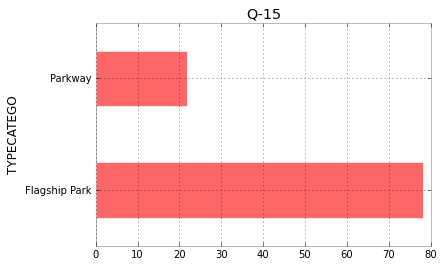

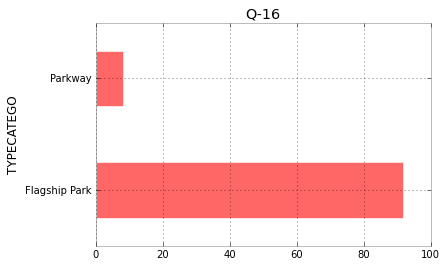

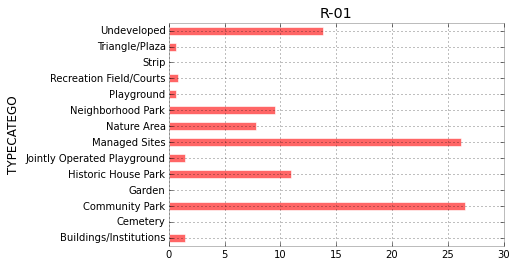

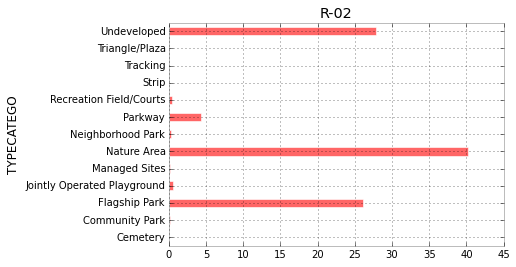

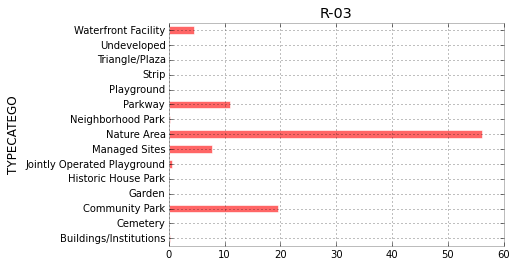

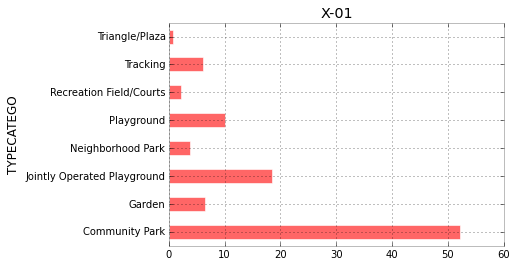

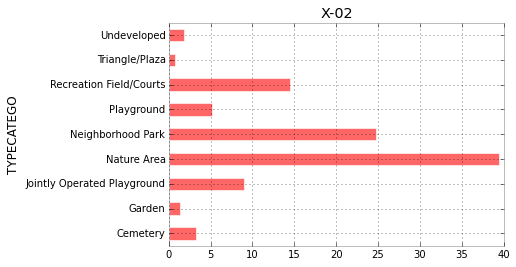

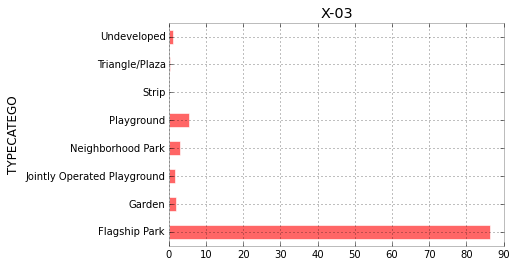

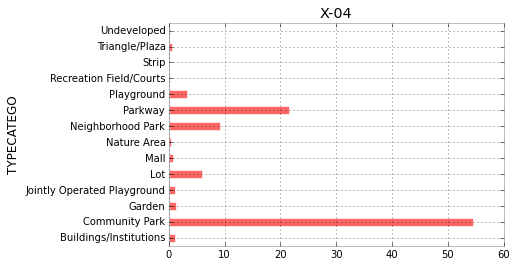

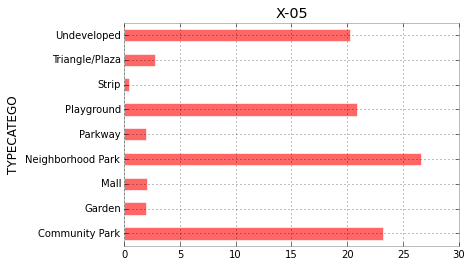

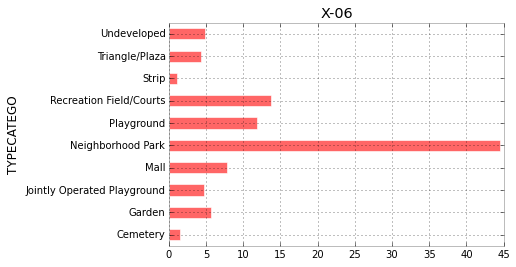

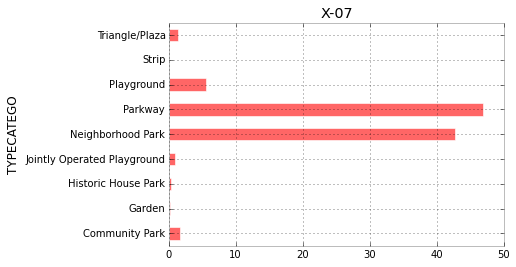

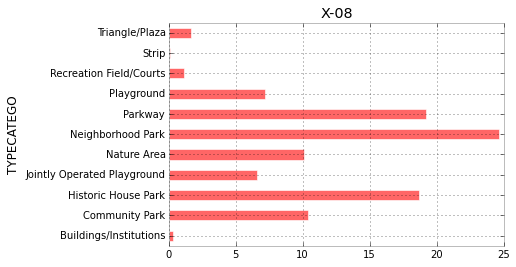

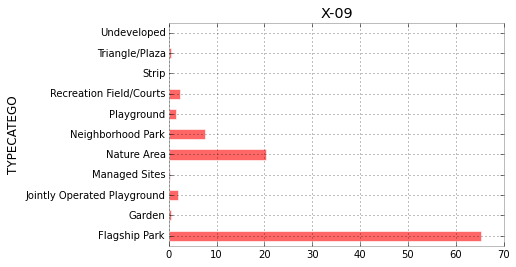

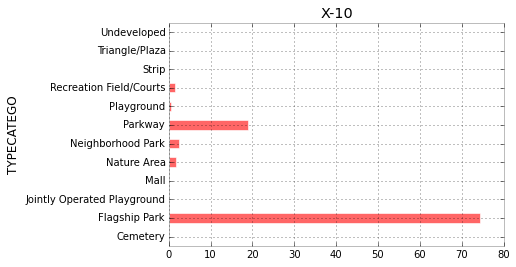

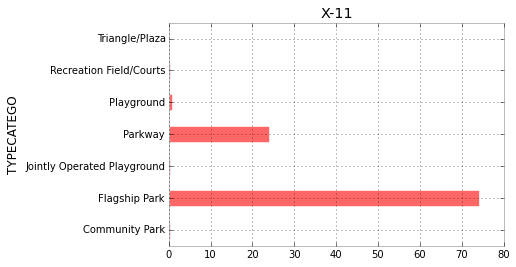

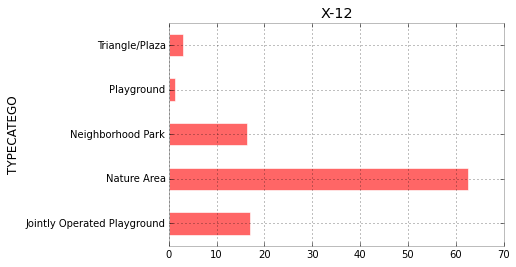

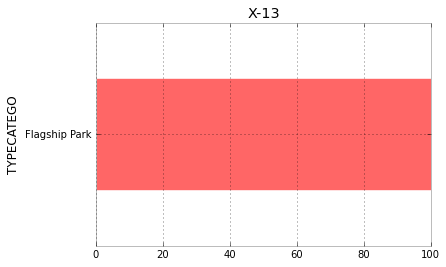

In [29]:
for name, cat in g:
    cat.plot( kind='barh',y='park_area_percent',x = 'TYPECATEGO', title=name, legend=False, color='red',alpha=.6)

## Overal land percent by category


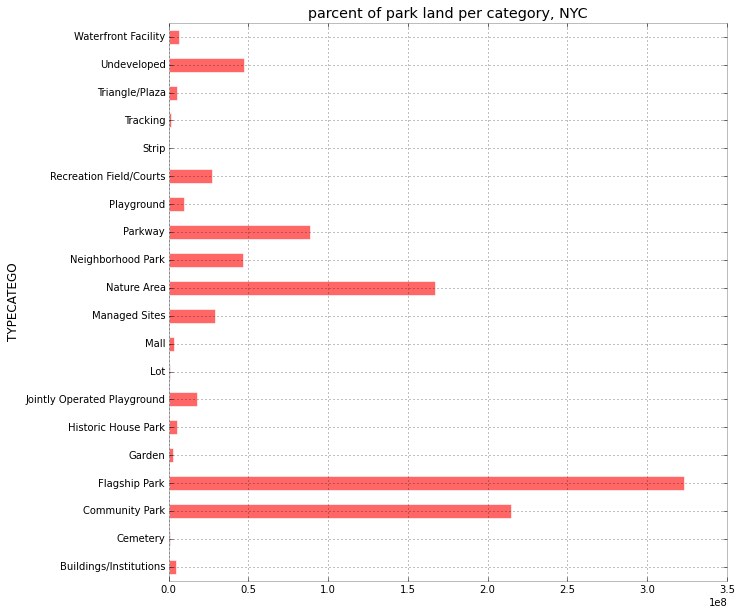

In [30]:
parks.groupby('TYPECATEGO').agg({'park_area':'sum'}).plot(kind='barh', 
                                                          figsize=(10,10), 
                                                          legend=False, 
                                                          color='red',
                                                          alpha=.6,
                                                          title= 'parcent of park land per category, NYC');

------------

 